# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
num_classes = 10
batch_size = 32
epoch = 24
img_rows, img_cols = 28,28

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

#Deal with format issues between different backends. Some put the no. of channels in the image before the width and height.
if K.image_data_format() == 'channels_first':
    trainX=trainX.reshape(trainX.shape[0],1,img_rows,img_cols)
    testX =testX.reshape(testX.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    trainX=trainX.reshape(trainX.shape[0],img_rows,img_cols,1)
    testX =testX.reshape(testX.shape[0],img_rows,img_cols,1)
    input_shape=(img_rows,img_cols,1)

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


In [ ]:
trainy = keras.utils.to_categorical(trainy,num_classes=num_classes)
testy = keras.utils.to_categorical(testy,num_classes=num_classes)

## 1.3. Визуализируем часть данных из датасета

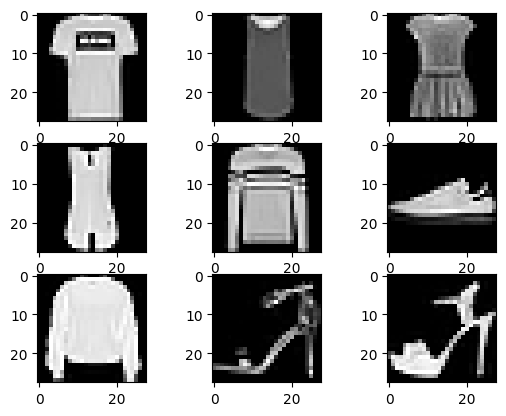

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))   #Removing MaxPooling layer: Add accuracy but reduces training speed
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

## 1.5. Обучаем модель

In [ ]:
EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(trainX, trainy, batch_size=batch_size, epochs=EPOCH, validation_data=(testX,testy))

model.evaluate(testX, testy) # метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки
                                   #(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

Epoch 1/5
1875/1875 [==============================] - 190s 97ms/step - loss: 0.4681 - accuracy: 0.8343 - val_loss: 0.3224 - val_accuracy: 0.8830
Epoch 2/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.3095 - accuracy: 0.8875 - val_loss: 0.2538 - val_accuracy: 0.9089
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.2551 - accuracy: 0.9069 - val_loss: 0.2284 - val_accuracy: 0.9159
Epoch 4/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.2264 - accuracy: 0.9178 - val_loss: 0.2397 - val_accuracy: 0.9136
Epoch 5/5
313/313 [==============================] - 12s 37ms/step - loss: 0.2182 - accuracy: 0.9205


[0.21821705996990204, 0.9204999804496765]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

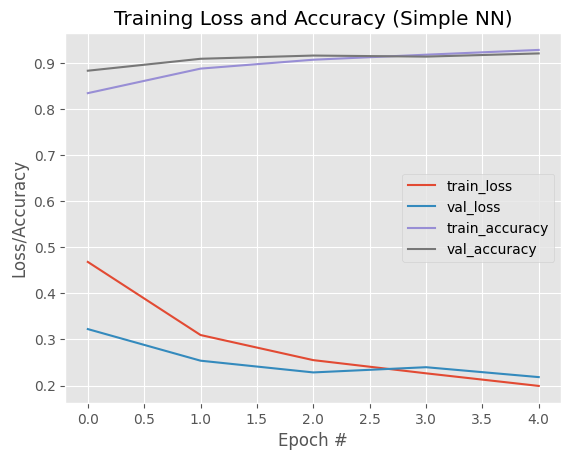

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving башмак.png to башмак.png


In [ ]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 130ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [1]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/cats_dogs_sheep")))
random.shuffle(imagePaths)

In [ ]:
from google.colab.patches import cv2_imshow

compression_size = 32

data, labels = load_images(imagePaths, compression_size)

In [ ]:
data = np.array(data, dtype='float')
labels = np.array(labels)

# data=data.reshape(len(data), compression_size, compression_size, 3)

print(data.shape)
print(labels.shape)

(4526, 32, 32, 3)
(4526,)


In [ ]:
(X_train, X_val, Y_train, Y_val) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42)

X_train=X_train.astype('float32')/255
X_val=X_val.astype('float32')/255

print(X_train.shape)
print(X_train.shape)

(3394, 32, 32, 3)
(3394, 32, 32, 3)


In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

print(Y_train.shape)
print(Y_val.shape)

print(Y_train[:3])
print(Y_val[:3])

(3394, 3)
(1132, 3)
[[0 0 1]
 [0 1 0]
 [1 0 0]]
[[1 0 0]
 [0 1 0]
 [0 1 0]]


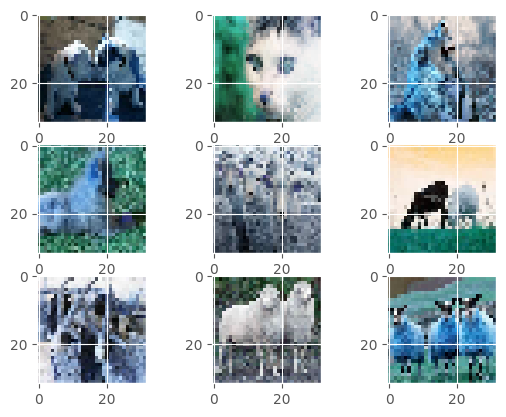

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(compression_size, compression_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))   #Removing MaxPooling layer: Add accuracy but reduces training speed
model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 256)              

In [ ]:
# model = keras.Sequential([
#     Conv2D(128, (4,4), strides=(1,1), activation='tanh', input_shape=(compression_size,compression_size,1)),
#     AveragePooling2D(pool_size=(2,2), strides=(2,2)),
#     Conv2D(64, (4,4), strides=(1,1), activation='tanh'),
#     AveragePooling2D(pool_size=(2,2), strides=(2,2)),
#     Flatten(),

#     Dense(units=120,activation='tanh'),
#     Dense(units=84,activation='tanh'),
#     Dense(units=3,activation='softmax')
# ])

In [ ]:
# model = keras.Sequential([
#     Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(compression_size, compression_size, 1)),
#     MaxPooling2D((2, 2), strides=2),
#     Conv2D(64, (3,3), padding='same', activation='relu'),
#     MaxPooling2D((2, 2), strides=2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(3,  activation='softmax')
# ])

# model.summary()

In [ ]:

X_train

array([[[[0.13725491, 0.3137255 , 0.2784314 ],
         [0.09803922, 0.23137255, 0.20392157],
         [0.02352941, 0.10980392, 0.09019608],
         ...,
         [0.3372549 , 0.5686275 , 0.47058824],
         [0.3137255 , 0.6039216 , 0.47843137],
         [0.24705882, 0.54901963, 0.41568628]],

        [[0.14509805, 0.30980393, 0.2784314 ],
         [0.16078432, 0.36862746, 0.32941177],
         [0.17254902, 0.28235295, 0.2627451 ],
         ...,
         [0.28235295, 0.54509807, 0.43137255],
         [0.2509804 , 0.58431375, 0.43137255],
         [0.20784314, 0.5294118 , 0.39215687]],

        [[0.16078432, 0.3882353 , 0.33333334],
         [0.07843138, 0.21960784, 0.18039216],
         [0.14117648, 0.28627452, 0.24705882],
         ...,
         [0.27058825, 0.5803922 , 0.4509804 ],
         [0.31764707, 0.627451  , 0.5019608 ],
         [0.27058825, 0.6117647 , 0.47843137]],

        ...,

        [[0.38431373, 0.25882354, 0.12941177],
         [0.4392157 , 0.38431373, 0.12941177]

In [ ]:
Y_train

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
INIT_LR = 0.0001
opt = Adam(learning_rate=INIT_LR)

model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, Y_val))

model.evaluate(X_val, Y_val)

Epoch 1/10
107/107 [==============================] - 24s 207ms/step - loss: 1.0846 - accuracy: 0.3886 - val_loss: 1.0274 - val_accuracy: 0.5327
Epoch 2/10
107/107 [==============================] - 21s 195ms/step - loss: 1.0019 - accuracy: 0.4965 - val_loss: 0.9188 - val_accuracy: 0.5680
Epoch 3/10
107/107 [==============================] - 22s 203ms/step - loss: 0.9302 - accuracy: 0.5492 - val_loss: 0.8665 - val_accuracy: 0.5875
Epoch 4/10
107/107 [==============================] - 20s 186ms/step - loss: 0.8877 - accuracy: 0.5766 - val_loss: 0.8363 - val_accuracy: 0.6034
Epoch 5/10
107/107 [==============================] - 23s 212ms/step - loss: 0.8585 - accuracy: 0.5916 - val_loss: 0.8378 - val_accuracy: 0.6078
Epoch 6/10
107/107 [==============================] - 21s 198ms/step - loss: 0.8579 - accuracy: 0.5902 - val_loss: 0.8032 - val_accuracy: 0.6413
Epoch 7/10
107/107 [==============================] - 22s 205ms/step - loss: 0.8198 - accuracy: 0.6226 - val_loss: 0.7878 - val_ac

[0.7503948211669922, 0.6757950782775879]

In [ ]:
predictions = model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

36/36 [==============================] - 1s 39ms/step
              precision    recall  f1-score   support

        cats       0.62      0.71      0.66       362
        dogs       0.62      0.44      0.52       368
       sheep       0.76      0.86      0.80       402

    accuracy                           0.68      1132
   macro avg       0.67      0.67      0.66      1132
weighted avg       0.67      0.68      0.67      1132



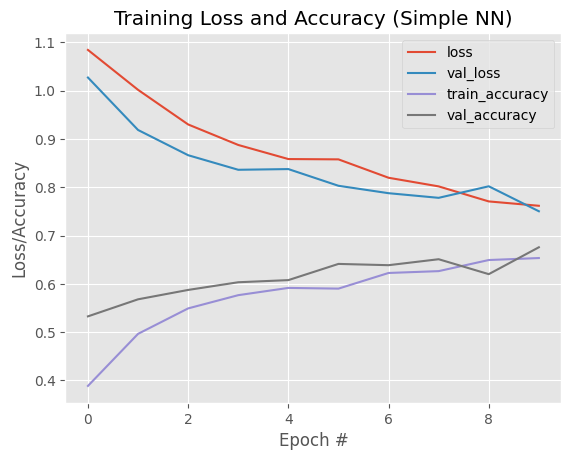

In [ ]:
N = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.3. Сохраните полученные модели

In [ ]:
# Ваш код

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
# Ваш код

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

print(test.shape)
print(train.shape)

(80, 64, 64)
(320, 64, 64)


### 3.1.2. Отрисуйте несколько примеров

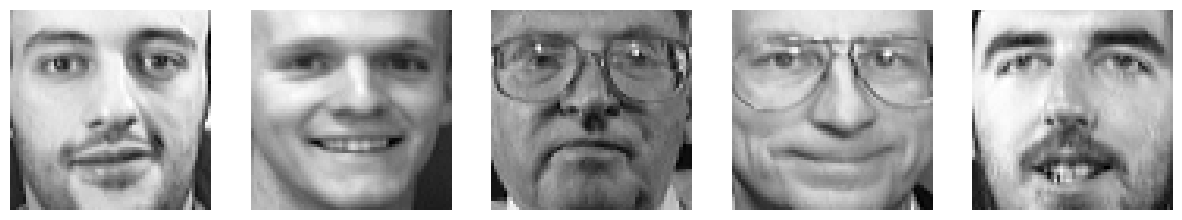

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]

X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
print(X_train.shape)
print(y_train.shape)

(320, 32, 64)
(320, 32, 64)


Вот один пример обучающей пары.

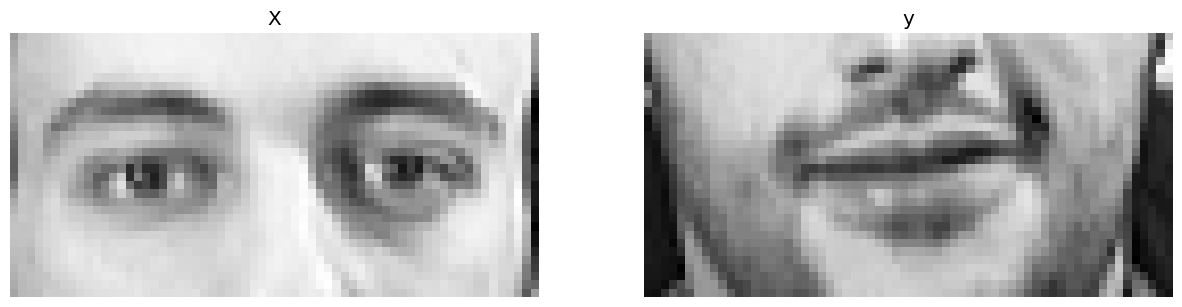

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
model2 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(32*64,  activation='sigmoid')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 64, 128)       1280      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 16, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 4096)             

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
y_train = y_train.reshape(len(y_train), 2048)
y_test = y_test.reshape(len(y_test), 2048)

print(y_train.shape)
print(y_test.shape)

(320, 2048)
(80, 2048)


In [ ]:
INIT_LR = 0.001
opt = Adam(learning_rate=INIT_LR)

model2.compile(optimizer=opt,
             loss='mse',
             metrics=['mse'])

history = model2.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test))

model2.evaluate(X_test, y_test)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 2/5
10/10 [==============================] - 12s 1s/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 5/5
3/3 [==============================] - 1s 189ms/step - loss: 0.0170 - mse: 0.0170


[0.017033370211720467, 0.017033370211720467]

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
preds = model2.predict(X_test, batch_size=16)

5/5 [==============================] - 1s 121ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

0.103805706

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
preds = preds.reshape(80, 32, 64)
y_test = y_test.reshape(80, 32, 64)

print(preds.shape)

(80, 32, 64)


Отрисуйте все предсказания.

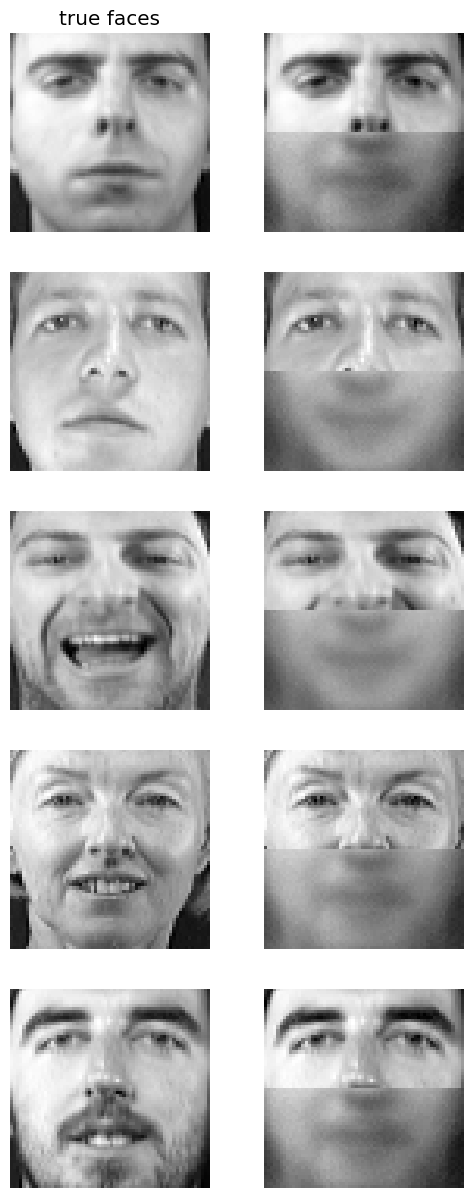

In [ ]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], preds[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )